Import libraries

In [1]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 as cv

In [16]:
image_path= "../examples/SOB_B_A-14-22549AB-40-019.png"

pretrained_model = models.resnet18(pretrained=True)
# print(list(pretrained_model.children())[-3])
layer = list(pretrained_model.children())[:-3]

def extract_features(model, image_path):
        # Load the image and apply the necessary transformations
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension

    model = nn.Sequential(*layer)
    model.eval()
    with torch.no_grad():
            features = model(image)

        
    return features.squeeze()


features = extract_features(layer, image_path)

"""# Create a 16x32 grid of subplots (to fit all 512 features)
fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(16, 8))

# Loop over the features and plot each one as an image in a subplot
for i in range(512):
    row = i // 32
    col = i % 32
    axs[row, col].imshow(features[i], cmap='gray')
    axs[row, col].axis('off')"""

# Show the plot
plt.show()

print(features.shape)

torch.Size([256, 14, 14])


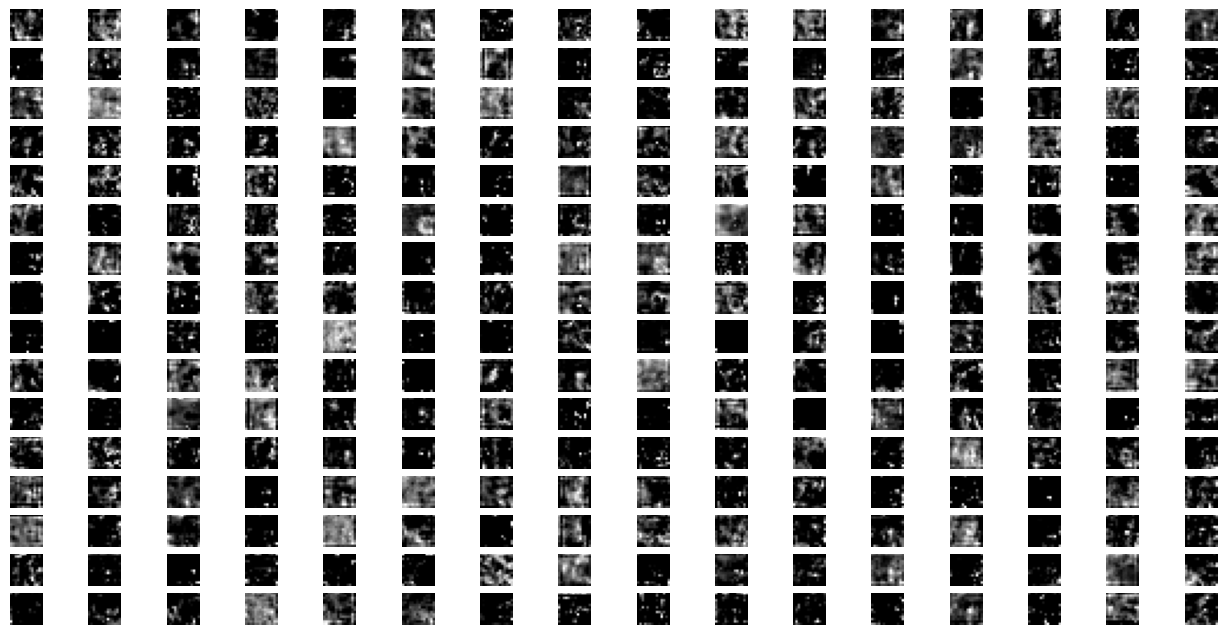

In [18]:
# Create a 16x32 grid of subplots (to fit all 512 features)
fig, axs = plt.subplots(nrows=16, ncols=16, figsize=(16, 8))

# Loop over the features and plot each one as an image in a subplot
for i in range(len(features)):
    row = i // 16
    col = i % 16
    axs[row, col].imshow(features[i], cmap='gray')
    axs[row, col].axis('off')

# Show the plot
plt.show()